In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/study.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total score                    0
average score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
print("Categories in 'gender' variable:   ",end="")
print(df['gender'].unique())

print("Catagories in 'race/ethnicity",end="")
print(df['race/ethnicity'].unique())        

print("Categories in 'parental level of education' variable: ",end="")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end="")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Catagories in 'race/ethnicity['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numeric features : {} '.format(len(numeric_features), (numeric_features)))
print('\nwe have {} categorical_features: {} '.format(len(categorical_features), (categorical_features)))

we have 3 numeric features : ['math score', 'reading score', 'writing score'] 

we have 5 categorical_features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


In [83]:
df.columns= df.columns.str.replace('_', ' ').str.lower()

In [84]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333


In [54]:
df['total score'] = df['math_score']+df['reading_score']+df['writing_score']    
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [55]:
reading_full = df[df['reading_score'] == 100]['average'].count()
print("Number of students who scored full marks in reading: ", reading_full)
writing_full = df[df['writing_score'] == 100]['average'].count()
print("Number of students who scored full marks in writing: ", writing_full)
math_full = df[df['math_score'] == 100]['average'].count()
print("Number of students who scored full marks in math: ", math_full)

Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14
Number of students who scored full marks in math:  7


In [56]:
reading_less_than_20 = df[df['reading_score'] < 20]['average'].count()
print(f'Number of students who scored less than 20 in reading:{ reading_less_than_20 }')
writing_less_than_20 = df[df['writing_score'] < 20]['average'].count()
print(f'Number of students who scored less than 20 in writing:{ writing_less_than_20 }')
math_less_than_20 = df[df['math_score'] < 20]['average'].count()
print(f'Number of students who scored less than 20 in math:{ math_less_than_20 }')


Number of students who scored less than 20 in reading:1
Number of students who scored less than 20 in writing:3
Number of students who scored less than 20 in math:4


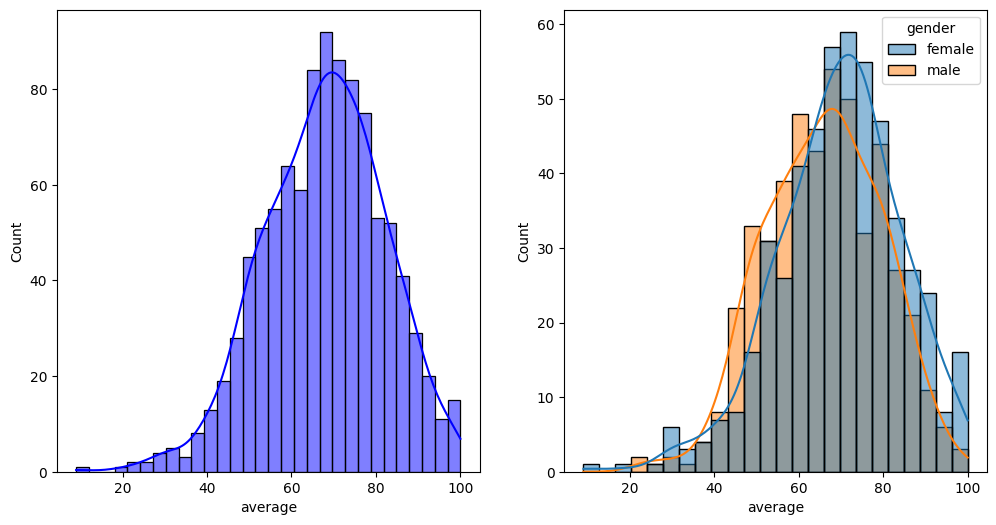

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30, kde= True, color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

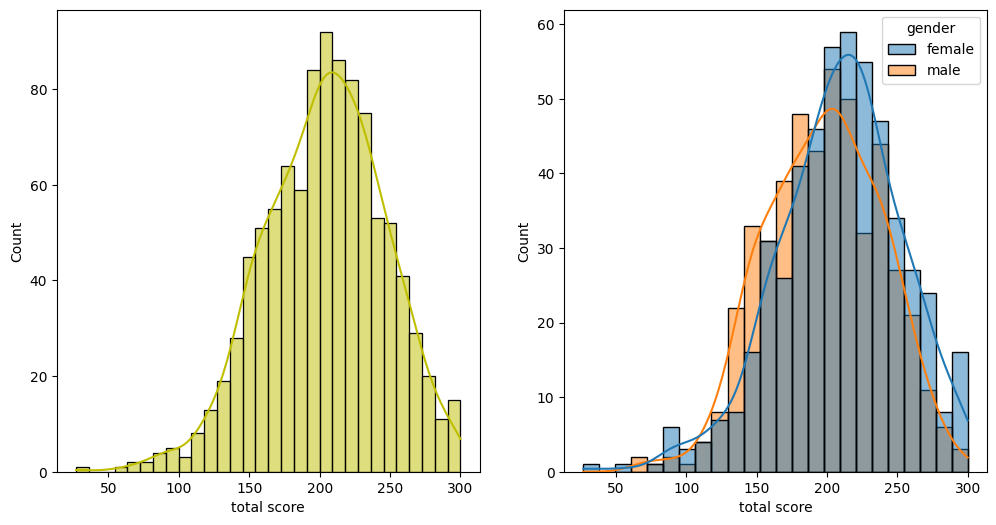

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30, kde= True, color='y')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender', color=[ 'red', 'green'])   
plt.show()

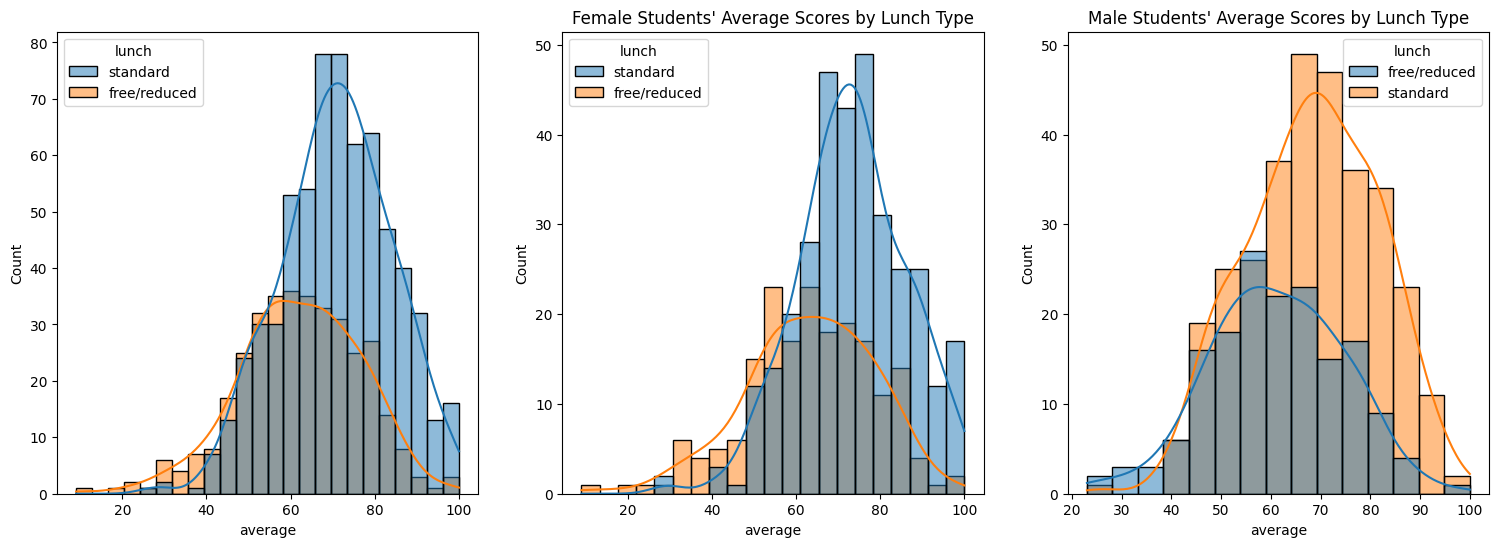

In [76]:


plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title("Female Students' Average Scores by Lunch Type")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title("Male Students' Average Scores by Lunch Type")
plt.show()



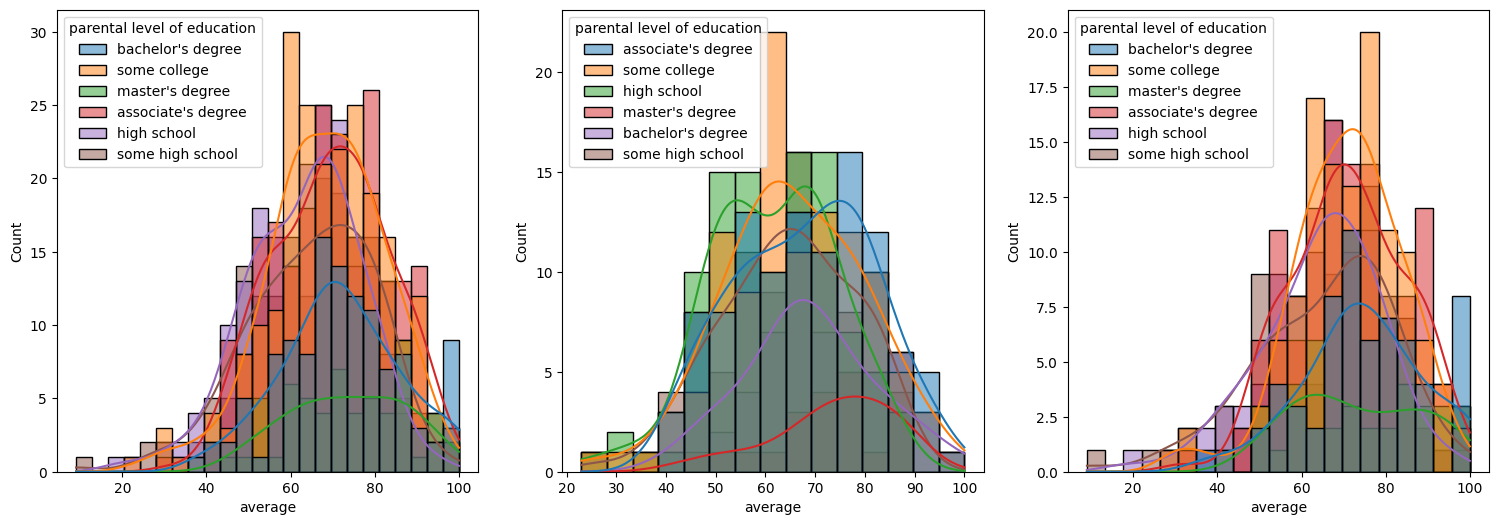

In [91]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

In [94]:
from ydata_profiling import ProfileReport
profile  = ProfileReport(df, explorative=True)

profile.to_file("report.html") 
print("profile report generated successfully.")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 60.04it/s]

profile report generated successfully.


In [6]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
dt=AV.AutoViz('data/study.csv')


Shape of your Data Set loaded: (1000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
gender,object,0.000000,0,,,No issue
race/ethnicity,object,0.000000,0,,,No issue
parental level of education,object,0.000000,0,,,No issue
lunch,object,0.000000,0,,,No issue
test preparation course,object,0.000000,0,,,No issue
math score,int64,0.000000,8,0.000000,100.000000,Column has 8 outliers greater than upper bound (107.00) or lower than lower bound(27.00). Cap them or remove them.
reading score,int64,0.000000,7,17.000000,100.000000,"Column has 6 outliers greater than upper bound (109.00) or lower than lower bound(29.00). Cap them or remove them., Column has a high correlation with ['math score']. Consider dropping one of them."
writing score,int64,0.000000,7,10.000000,100.000000,"Column has 5 outliers greater than upper bound (110.88) or lower than lower bound(25.88). Cap them or remove them., Column has a high correlation with ['math score', 'reading score']. Consider dropping one of them."


Number of All Scatter Plots = 6
All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
